In [1]:
#Imported Libraries
import pandas as pd
import nltk
import os
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from matplotlib import pyplot as plt
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
#loading base diretory of stored Data
path = './/data//'
final_df=pd.DataFrame()

In [43]:
# Loading the scraped csv files
final_df
files = os.listdir(path)
for file in files:
    f=pd.read_csv(path+file)
    final_df=pd.concat([final_df,f],ignore_index=True)

In [62]:
#Final loaded data
final_df.head()

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
0,K26_sDKnvMU,1,Toy Story (1995),['at first toy story wasn t confirmed as pixat...,Trailer for Toy Story (1995) captured from the...,102902.0,99.0,12.0,13,0 days 00:01:31,0,0.4334,pos
1,rEnOoWs3FuA,3,Grumpier Old Men (1995),"['href b grumpy er b br b grumpier b', 'i m wa...","The more things change, the more they stay the...",164983.0,218.0,8.0,12,0 days 00:01:51,0,0.9052,pos
2,2GfZl4kuVNI,6,Heat (1995),['saw this one with my dad theater i was like ...,"Director: Michael Mann.\nCast: Al Pacino, Robe...",1087899.0,5464.0,162.0,527,0 days 00:02:28,0,0.9985,pos
3,-C-xXZyX2zU,8,Tom and Huck (1995),"['what funny movie brad was awesome actor', 'r...",A preview for this 90s disney movie. From the ...,168443.0,176.0,17.0,83,0 days 00:01:00,0,0.9136,pos
4,lcOqUE0u1LM,10,GoldenEye (1995),"['n64', 'this trailer was horrible', 'every bo...","Release Date: November 13, 1995\n\nPierce Bros...",212646.0,998.0,33.0,103,0 days 00:02:52,0,0.9842,pos


In [63]:
#Total numbr of rows scraped
len(final_df)

17456

## Sentiment Analysis 

Implemting the sentiment analysis using VADER

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.

In [64]:
#Adding new column with Sentiment Score
final_df['scores'] = final_df['comment'].apply(lambda a: sid.polarity_scores(a)['compound'])

final_df.head()

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
0,K26_sDKnvMU,1,Toy Story (1995),['at first toy story wasn t confirmed as pixat...,Trailer for Toy Story (1995) captured from the...,102902.0,99.0,12.0,13,0 days 00:01:31,0,0.4334,pos
1,rEnOoWs3FuA,3,Grumpier Old Men (1995),"['href b grumpy er b br b grumpier b', 'i m wa...","The more things change, the more they stay the...",164983.0,218.0,8.0,12,0 days 00:01:51,0,0.9052,pos
2,2GfZl4kuVNI,6,Heat (1995),['saw this one with my dad theater i was like ...,"Director: Michael Mann.\nCast: Al Pacino, Robe...",1087899.0,5464.0,162.0,527,0 days 00:02:28,0,0.9985,pos
3,-C-xXZyX2zU,8,Tom and Huck (1995),"['what funny movie brad was awesome actor', 'r...",A preview for this 90s disney movie. From the ...,168443.0,176.0,17.0,83,0 days 00:01:00,0,0.9136,pos
4,lcOqUE0u1LM,10,GoldenEye (1995),"['n64', 'this trailer was horrible', 'every bo...","Release Date: November 13, 1995\n\nPierce Bros...",212646.0,998.0,33.0,103,0 days 00:02:52,0,0.9842,pos


In [70]:
#Classifying based on score
final_df['comp_score'] = final_df['scores'].apply(lambda c: 'pos' if c >=0 else 'neg')

final_df.head()

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
0,K26_sDKnvMU,1,Toy Story (1995),['at first toy story wasn t confirmed as pixat...,Trailer for Toy Story (1995) captured from the...,102902.0,99.0,12.0,13,0 days 00:01:31,0,0.4334,pos
1,rEnOoWs3FuA,3,Grumpier Old Men (1995),"['href b grumpy er b br b grumpier b', 'i m wa...","The more things change, the more they stay the...",164983.0,218.0,8.0,12,0 days 00:01:51,0,0.9052,pos
2,2GfZl4kuVNI,6,Heat (1995),['saw this one with my dad theater i was like ...,"Director: Michael Mann.\nCast: Al Pacino, Robe...",1087899.0,5464.0,162.0,527,0 days 00:02:28,0,0.9985,pos
3,-C-xXZyX2zU,8,Tom and Huck (1995),"['what funny movie brad was awesome actor', 'r...",A preview for this 90s disney movie. From the ...,168443.0,176.0,17.0,83,0 days 00:01:00,0,0.9136,pos
4,lcOqUE0u1LM,10,GoldenEye (1995),"['n64', 'this trailer was horrible', 'every bo...","Release Date: November 13, 1995\n\nPierce Bros...",212646.0,998.0,33.0,103,0 days 00:02:52,0,0.9842,pos


## Data Analysis 

In data analysis we are inspecting data with the goal of discovering useful information.

#### d. Using a bar diagram, show the top-10 videos based on total views

In [61]:
#Top 10 movies based on total views using nlargest function of dataframe
top_10_views=final_df.nlargest(10, "view_count")
top_10_views

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
10180,450p7goxZqg,111226,All of Me (2013),['if you re watching this 3029 br you re legen...,Official music video for “All of Me” by John L...,1.999947e+09,10959700.0,331429.0,232700,0 days 00:05:08,0,0.9979,pos
11572,dNJdJIwCF_Y,120853,Fresh Guacamole (2012),"['ch o m nh l ng i vi t nam', 'mmmmmmm that gr...",The 2013 Academy Award Nominated film by PES. ...,4.237530e+08,2390876.0,293507.0,66455,0 days 00:01:41,0,-0.0534,neg
14825,j-V12tL78Mc,5364,Unfaithful (2002),"['she dersved', 'me encanta esta pel cula', 'p...",Unfaithful movie clips: http://j.mp/1ixkUnl\nB...,1.224264e+08,65973.0,32631.0,4952,0 days 00:02:43,0,-0.8510,neg
9015,NVcSNnqRD0c,104076,"Smurfs 2, The (2013)",['my brother us watching this smurfs movie rn ...,Britney Spears' official music video for 'Ooh ...,1.188945e+08,754563.0,53516.0,58992,0 days 00:04:21,0,0.9913,pos
11995,z5rRZdiu1UE,126106,Beastie Boys: Sabotage (1994),"['den suger quenn', 'cochese', 'zabkatage', 'w...",REMASTERED IN HD!\nRead the story behind Ill C...,9.478432e+07,566727.0,17721.0,24742,0 days 00:03:04,0,0.8802,pos
4481,SvGcGjIc16I,76189,Growth (2009),"['is it like slither', 'eww gross but interest...","Here is the trailer for Growth, the latest fil...",6.566778e+07,29050.0,15575.0,30,0 days 00:02:06,0,0.9954,pos
5848,3H8bnKdf654,87520,Transformers: Dark of the Moon (2011),['fun fact sentinel s facial features were bas...,Subscribe! http://YouTube.com/ClevverTV\n\nWat...,5.311235e+07,108748.0,6126.0,22622,0 days 00:02:28,0,0.9566,pos
10294,9ItBvH5J6ss,111921,The Fault in Our Stars (2014),['upon cancer patient love story been my favou...,The Fault In Our Stars | Official Trailer: Haz...,4.631968e+07,584650.0,7322.0,40270,0 days 00:02:30,0,-0.9088,neg
1348,8LPH9F2vWpY,34466,Hum Dil De Chuke Sanam (1999),['play free music back back only eros now href...,Subscribe Now for More Exclusive Videos! https...,4.497093e+07,123157.0,11615.0,5151,0 days 00:06:32,0,0.9968,pos
11947,sdUUx5FdySs,125926,Kiwi! (2006),['no os voy mentir no llore br br me dio mucha...,"My Master's Thesis Animation, which I complete...",4.494770e+07,473496.0,14681.0,68436,0 days 00:03:10,0,-0.9856,neg


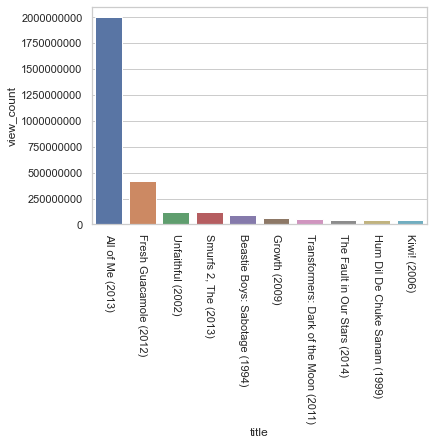

In [48]:
# Bar graph to sow the result
sns.set_theme(style="whitegrid")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=270)
ax = sns.barplot(x="title", y="view_count", data=top_10_views)

#### e.Using a bar diagram, show the bottom-10 videos based on total views

In [66]:
#Bottom 10 movies based on total views using nsmallest function of dataframe
bottom_10_views=final_df.nsmallest(10, "view_count")
bottom_10_views

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
11994,Llzputr6QZM,126104,Stella: Live in Boston (2009),[],Stella Live In Boston (2009),4.0,0.0,0.0,0,0 days 00:00:35,0,0.0,pos
10949,OUf6CIW7C8Q,116283,And So It Is (1966),[],NaN,7.0,0.0,0.0,0,0 days 00:01:09,0,0.0,pos
12326,EwM3gtL22E4,128856,Crockdale (2011),[],NaN,13.0,0.0,0.0,0,0 days 00:57:54,0,0.0,pos
8762,HX7dx_w_Ol8,102860,Hilton! (2013),[],,17.0,0.0,0.0,0,0 days 00:00:18,0,0.0,pos
12442,sYpW4fvlf7s,129777,Chronic Town (2010),[],Reclusive indie pioneers The Long Afternoon pe...,34.0,0.0,0.0,0,0 days 00:03:34,0,0.0,pos
11063,hHJow-uF3A0,116945,Freedom (2009),[],Cabrainnnnnnnn,35.0,0.0,0.0,0,0 days 00:01:01,0,0.0,pos
9616,CA2QbzFUoQQ,107621,"Wooden Bridge, The (2012)",[],Cornerstone Wooden Bridge,42.0,0.0,0.0,0,0 days 00:00:58,0,0.0,pos
10059,9B-65BWKwQM,110314,"Me Two (Personne aux deux personnes, La) (2008)",[],warheads they are sour,50.0,0.0,0.0,0,0 days 00:00:56,0,0.0,pos
11492,tQplNZJL8XI,120208,Flesh and Blood (1922),[],Directed by Irving Cummings\nStarring:\nLon Ch...,81.0,0.0,0.0,0,0 days 01:13:18,0,0.0,pos
9738,zrhl2wZrvgI,108316,American Scary (2006),[],American Scary,83.0,0.0,0.0,0,0 days 00:02:40,0,0.0,pos


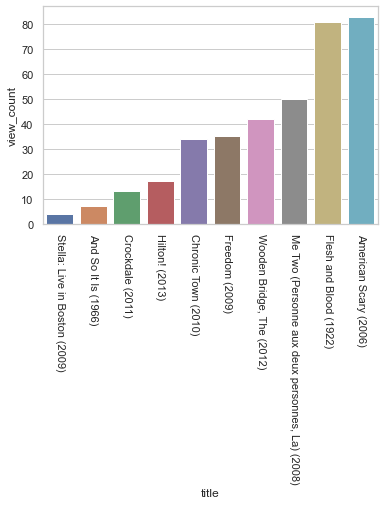

In [50]:
# Bar graph to sow the result of least views
sns.set_theme(style="whitegrid")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=270)
ax = sns.barplot(x="title", y="view_count", data=bottom_10_views)

#### f.The title of the video that has the most likes

In [51]:
final_df.nsmallest(1, "like_count")['title']

427    Bread and Chocolate (Pane e cioccolata) (1973)
Name: title, dtype: object

#### g.The title of the video that has the least likes

In [52]:
final_df.nlargest(1, "like_count")['title']

10180    All of Me (2013)
Name: title, dtype: object

#### h.The title of the video that has the highest duration

In [53]:
# Converting duration column string time into time column using pandas datetime
temp=pd.to_timedelta(final_df['duration'])
temp

D:\anaconda\lib\site-packages\pandas\core\arrays\timedeltas.py:957: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  data = objects_to_td64ns(data, unit=unit, errors=errors)


0       0 days 00:01:31
1       0 days 00:01:51
2       0 days 00:02:28
3       0 days 00:01:00
4       0 days 00:02:52
              ...      
17451   0 days 00:02:57
17452   0 days 00:01:52
17453   0 days 00:01:21
17454   0 days 01:24:42
17455   0 days 00:02:02
Name: duration, Length: 17456, dtype: timedelta64[ns]

In [67]:
# Displaying converted column
final_df['duration']=temp
final_df.head()

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
0,K26_sDKnvMU,1,Toy Story (1995),['at first toy story wasn t confirmed as pixat...,Trailer for Toy Story (1995) captured from the...,102902.0,99.0,12.0,13,0 days 00:01:31,0,0.4334,pos
1,rEnOoWs3FuA,3,Grumpier Old Men (1995),"['href b grumpy er b br b grumpier b', 'i m wa...","The more things change, the more they stay the...",164983.0,218.0,8.0,12,0 days 00:01:51,0,0.9052,pos
2,2GfZl4kuVNI,6,Heat (1995),['saw this one with my dad theater i was like ...,"Director: Michael Mann.\nCast: Al Pacino, Robe...",1087899.0,5464.0,162.0,527,0 days 00:02:28,0,0.9985,pos
3,-C-xXZyX2zU,8,Tom and Huck (1995),"['what funny movie brad was awesome actor', 'r...",A preview for this 90s disney movie. From the ...,168443.0,176.0,17.0,83,0 days 00:01:00,0,0.9136,pos
4,lcOqUE0u1LM,10,GoldenEye (1995),"['n64', 'this trailer was horrible', 'every bo...","Release Date: November 13, 1995\n\nPierce Bros...",212646.0,998.0,33.0,103,0 days 00:02:52,0,0.9842,pos


In [69]:
#Displaying the highest duration data
top_10_duration=final_df.nlargest(10, "duration")
top_10_duration

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
6392,RBB_6gpUE-Q,91444,Getting to Know You (1999),[],"Trailer for the independent film ""Getting to K...",3777.0,2.0,3.0,0,0 days 12:49:24,0,0.0000,pos
9221,eJ3RzGoQC4s,105250,"Century of the Self, The (2002)","['dawn public manipulation', 'eric bernays jus...",Adam Curtis Documentary. \n\nhttps://en.m.wiki...,2761597.0,32859.0,712.0,604,0 days 03:54:44,0,-0.8945,neg
16262,eIozQwKTxp0,7767,"Best of Youth, The (La meglio gioventù) (2003)",['what beautiful movie seen it twice till now ...,The best of youth (trailer)\r\nItalian movie 2...,319944.0,391.0,30.0,47,0 days 03:49:44,0,0.9937,pos
11842,SQpu78OePTA,124273,Kevin Smith: Too Fat For 40 (2010),[],Poking fun at his much-publicized brouhaha wit...,NaN,47.0,5.0,0,0 days 03:19:28,0,0.0000,pos
11667,bxKkeqN4LCI,121403,Elvis and Me (1988),"['i get no volume', 'ugh where is sound', 'no ...","""Copyright Disclaimer Under Section 107 of the...",370930.0,1743.0,125.0,374,0 days 03:04:07,0,-0.9895,neg
12213,NLV2Pojnvwg,127644,The Trial of Lee Harvey Oswald (1977),['i dont believe oswald had pistol when he was...,"This is the complete 1977 TV movie ""The Trial ...",100379.0,535.0,49.0,445,0 days 03:03:23,0,-0.9985,neg
9809,mu-lS0CQ4rE,108816,"Sleep Room, The (1998)",['lovely contradiction trying heal or assist m...,NaN,19009.0,246.0,9.0,74,0 days 02:59:00,0,0.9691,pos
10473,-APF0-L14kw,112978,Caesar (Julius Caesar) (2002),"['no mention crassus at all weird', 'href', 't...",NaN,5512177.0,19484.0,1830.0,2416,0 days 02:57:38,0,-0.2058,neg
12323,3Rp5nifbB2Y,128848,The Big One: The Great Los Angeles Earthquake ...,"['watching again got be ready all us do amen',...",NaN,3071705.0,9420.0,1230.0,2337,0 days 02:57:34,0,0.7038,pos
1581,Vv032qeQvN0,41650,Mother India (1957),['utter lawlessness highly overrated movie sor...,all time hits movie,3784322.0,8407.0,2387.0,641,0 days 02:54:36,0,0.9971,pos


#### i.Using a bar diagram, show the top-10 videos that have the highest positive sentiment scores, which you calculated from the comments

In [18]:
top_10_score=final_df.nlargest(10, "scores")
top_10_score

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
8888,TiU-f7b7WwQ,103465,Call Girl (2012),['utmarkt film is this related geijer scandal ...,,369259.0,299.0,39.0,29,1M37S,0,1.0000,pos
11640,AgqQyBWWTq8,121259,The Tattooist (2007),"['where can i watch this plz', 'where can i fi...",No Copyright Infringement Intended.,45590.0,179.0,11.0,13,2M16S,0,1.0000,pos
4084,1m-4qxz08So,72169,Good Hair (2009),"['love it', 'good movie', 'you can be natural ...",http://www.goodhairmovie.net \r\r\n\r\r\nIn Th...,1698126.0,3903.0,109.0,1333,2M33S,0,0.9999,pos
4855,2LAijDQ2cIE,79667,Call Me Madam (1953),"['her voice is hideous', 'ethel s voice is so ...",Written by Irving Berlin\r\nSung by Donald O'C...,220396.0,1570.0,27.0,115,3M5S,0,0.9999,pos
9184,NLKS0XGRYi8,105034,Shadowlands (1985),['greatest man history had no servants yet the...,"""Shadowlands"" - Drama with Anthony Hopkins, De...",360308.0,850.0,30.0,124,2M26S,0,0.9999,pos
14794,3DFacqQp8uw,5311,"Watcher in the Woods, The (1980)",['i remember this being at afternoon back when...,"When a family moves to a country home, the you...",560479.0,1471.0,53.0,376,1M50S,0,0.9999,pos
15400,uDrSn0wrJTU,6255,"Bible, The (a.k.a. Bible... In the Beginning, ...",['not that long ago i watch this full movie he...,The Bible: In the Beginning... (1966) Trailer\...,497380.0,1004.0,56.0,121,3M45S,0,0.9999,pos
4455,anIO0b6TIkQ,76034,"Cross: The Arthur Blessitt Story, The (2009)",['i love you lord jesus christ thank you your ...,"""The Cross, the Arthur Blessitt Story"" Full le...",73478.0,1444.0,29.0,448,1H33M4S,0,0.9998,pos
5656,u3C2HvQ8KFE,86330,Forever Strong (2008),"['this is goooood movie', '4 27 pm', 'iam just...",The official Forever Strong Trailer gives a sn...,2358230.0,3515.0,202.0,1005,2M38S,0,0.9998,pos
7052,tDw7OqVBT-w,96488,Searching for Sugar Man (2012),"['best doco ever', 'he use wear suit tie work ...",,1191487.0,2280.0,72.0,218,2M1S,0,0.9998,pos


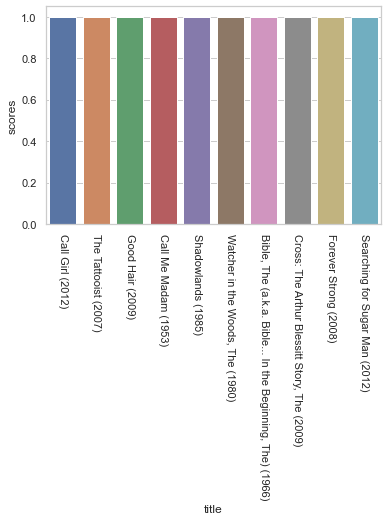

In [19]:
sns.set_theme(style="whitegrid")
plt.xticks(rotation=270)
ax = sns.barplot(x="title", y="scores", data=top_10_score)

#### j.Using a bar diagram, show the bottom-10 videos that have the highest negative sentiment scores, which you calculated from the comments 

In [16]:
#displaying video with lowest score
bottom_10_score=final_df.nsmallest(10, "scores")
bottom_10_score

,youtubeId,movieId,title,comment,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,scores,comp_score
6142,2Ebfqkv2Yg8,89650,Ironclad (2011),"['bad trailer is detrimental good movie', 'wha...",Was macht eigentlich ein Fantasyfilm aus? Ist ...,107933.0,64.0,6.0,8,2M10S,0,-0.9999,neg
8841,5KpzBAKJmig,103255,Dirty Wars (2013),"['br love this movie br href br', 'only libera...","http://www.joblo.com - ""Dirty Wars"" - Official...",315570.0,988.0,44.0,286,2M21S,0,-0.9999,neg
12655,i0KTI7_PCfI,2194,"Untouchables, The (1987)","['one best films history', 'untouchables 1987 ...","""Federal agent Elliot Ness assembles a persona...",197684.0,307.0,13.0,24,2M52S,0,-0.9999,neg
3073,9DrgSHIJXAQ,60503,Katyn (2007),['brutality is brutality respect poland don t ...,"After Germany’s invasion of Poland, in 1940 Jo...",406478.0,555.0,43.0,244,1M47S,0,-0.9996,neg
4879,vlu2YgXBjis,79830,Captain Conan (Capitaine Conan) (1996),['cashier wins by head smash solid oak table a...,"Los Balcanes, Septiembre de 1918. La toma del ...",67931.0,74.0,14.0,40,1M30S,0,-0.9996,neg
8936,Z6AhmbRqSgU,103673,Gitmo (2005),['biblical event is great flood that will happ...,"In the wake of 911 2001 terrorist attacks, the...",38543.0,85.0,15.0,56,1H14M39S,0,-0.9996,neg
2970,biRvF7UwW4Q,59604,"Girl Next Door, The (2007)",['finished watching this movie felt bad her at...,Based on the Jack Ketchum novel of the same na...,260419.0,493.0,44.0,151,2M22S,0,-0.9994,neg
2824,QwfiEb1G8nw,58287,Descent (2007),['this was frightening but could very well occ...,Official Trailer,468256.0,189.0,47.0,105,1M51S,0,-0.9993,neg
7078,0uIWGOKW5OM,96610,Looper (2012),"['honest trailer', 'why are you going mid', 'o...",The first official trailer for Rian Johnson's ...,1450062.0,3985.0,112.0,1317,1M49S,0,-0.9993,neg
7363,AAlRZ8CHgBU,98406,Raw Deal: A Question of Consent (2001),['tbh this documentary should be free not many...,Raw Deal is one of the most exposing and contr...,80878.0,83.0,16.0,39,3M4S,0,-0.9993,neg


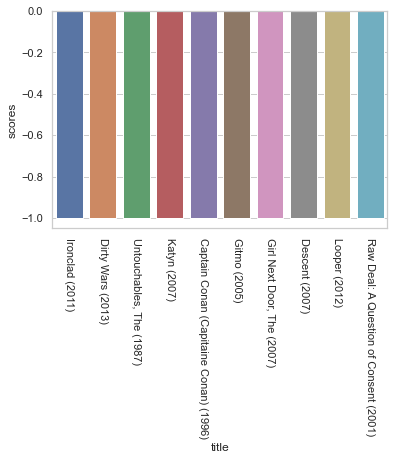

In [17]:
#visualizing the result in graph
sns.set_theme(style="whitegrid")
plt.xticks(rotation=270)
ax = sns.barplot(x="title", y="scores", data=bottom_10_score)

#### Displaying count of classifyied reviews

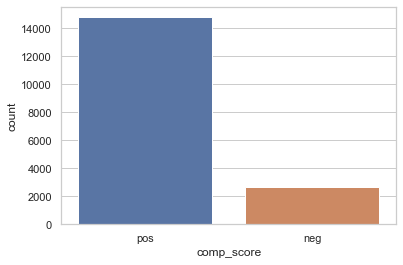

In [71]:
ax = sns.countplot(x="comp_score", data=final_df)